# Euchre

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.insert(0, 'C:/Users/jerem/Desktop/nonsense/euchre/')

from utils.utils import EuchreGame

### Create Game object, check attributes

In [6]:
euchre_game = EuchreGame()

In [7]:
# create show_all_game_attributes method?
euchre_game.score

{'t1': 0, 't2': 0}

In [8]:
euchre_game.dealer

'p1'

In [9]:
euchre_game.next_to_deal

['p2', 'p3', 'p4', 'p1']

### Strategies
#### Call Trump Strategy
* always
* None  
#### Play Card Strategy
* random
* None

In [10]:
euchre_game.tm_call_trump_strategy

{'t1': None, 't2': None}

In [11]:
euchre_game.tm_play_card_strategy

{'t1': None, 't2': None}

### Deal cards

In [18]:
deck_of_cards = euchre_game.shuffle_deck_of_cards()
for card in deck_of_cards:
    print(card, end=',')

9_S,9_C,9_H,9_D,T_S,T_C,T_H,T_D,J_S,J_C,J_H,J_D,Q_S,Q_C,Q_H,Q_D,K_S,K_C,K_H,K_D,A_S,A_C,A_H,A_D,

In [19]:
len(deck_of_cards)

24

In [14]:
player_hands, card_flipped_up = euchre_game.deal_hand()

In [15]:
player_hands

{'p1': ['J_D', 'J_C', 'T_S', 'T_H', 'K_C'],
 'p2': ['K_S', 'Q_D', 'A_S', '9_D', 'T_D'],
 'p3': ['K_D', 'K_H', 'J_H', '9_S', 'T_C'],
 'p4': ['9_H', '9_C', 'J_S', 'Q_C', 'Q_S']}

In [16]:
card_flipped_up

'Q_H'

### Choose suit for trump

In [12]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                                 player='p1', 
                                 card_flipped_up='A_S'):
    print('order up trump')

In [13]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_S', 'J_C', 'J_S'], 
                                 player='p2', 
                                 card_flipped_up='A_S'):
    print('order up trump')

order up trump


In [14]:
euchre_game.choose_open_trump(hand=['K_S', 'A_S', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='A_D')

'S'

In [15]:
euchre_game.choose_open_trump(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='T_S')

In [16]:
calling_player, trump = euchre_game.determine_trump(card_flipped_up=card_flipped_up,
                           player_hands=player_hands)

In [17]:
print(player_hands)
print(calling_player)
print(trump)

{'p1': ['J_D', 'Q_S', 'Q_D', 'K_C', 'K_S'], 'p2': ['J_H', 'T_S', '9_S', '9_D', 'T_C'], 'p3': ['T_H', 'Q_H', 'T_D', 'K_D', 'Q_C'], 'p4': ['J_S', 'A_S', '9_H', 'K_H', '9_C']}
None
None


### Play trick

In [18]:
cards_in_play, player_led = euchre_game.play_trick(player_hands=player_hands, 
                                                   trump='H', 
                                                   next_to_play_list=euchre_game.next_to_deal, 
                                                   cards_played_this_hand = [], 
                                                   unplayed_trump_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'],
                                                   verbose=True)

Leading with highest trump card remaining- Player p2 plays J_H, Current winning player p2
Following suit with lowest trump card- Player p3 plays T_H, Current winning player p2
Teammate winning, following suit w/ lowest trump card- Player p4 plays 9_H, Current winning player p2
Following suit with lowest trump card- Player p1 plays J_D, 

In [19]:
cards_in_play

{'p2': 'J_H', 'p3': 'T_H', 'p4': '9_H', 'p1': 'J_D'}

In [20]:
player_led

'p2'

#### Determine trick winner

In [21]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_H', 'p1': 'A_S'}, 
                           trump='S', 
                           player_led=player_led, 
                                   verbose=True)

p3 wins trick


'p3'

In [22]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_S', 'p1': 'A_S'}, 
                           trump='D', 
                           player_led=player_led, 
                                   verbose=False)

'p1'

In [23]:
trick_winner = euchre_game.determine_trick_winner(cards_in_play=cards_in_play,
                                           trump='H',
                                           player_led=player_led)

trick_winner

'p2'

In [24]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_H', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [25]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p1'

In [26]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [27]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p2'

#### Swap card in dealer hand

In [28]:
from utils import swap_dealer_card

In [29]:
swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_C', 'A_D', 'K_H', 'K_S', 'J_D'], 
                 verbose=True)

Dealer discards K_H and picks up A_S


['J_C', 'A_D', 'K_S', 'J_D', 'A_S']

In [30]:
swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_H', 'A_D', 'K_H', 'K_S', 'T_D'], 
                 verbose=True)

Dealer discards T_D and picks up A_S


['J_H', 'A_D', 'K_H', 'K_S', 'A_S']

In [31]:
swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['9_H', 'T_H', 'K_H', 'Q_H', 'A_D'], 
                 verbose=True)

Dealer discards A_D and picks up A_S


['9_H', 'T_H', 'K_H', 'Q_H', 'A_S']

In [32]:
swap_dealer_card(card_flipped_up='J_S', 
                 dealer_hand=['9_S', 'A_S', 'Q_S', 'K_S', 'T_S'], 
                 verbose=True)

Dealer discards 9_S and picks up J_S


['A_S', 'Q_S', 'K_S', 'T_S', 'J_S']

## Play card

In [37]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='S',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      unplayed_trump_this_hand=[],
                      verbose=True)

Current winning player p3
Following suit with highest card- 

'J_D'

In [38]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='D',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      unplayed_trump_this_hand=[],
                      verbose=True)

Current winning player p2
Teammate winning, following suit w/ lowest trump card- 

'J_H'

### Play lead card

In [12]:
def play_lead_card(hand,
                   trump,
                   cards_played_this_hand,
                   unplayed_trump_this_hand,
                   verbose=False):
    """
    Play lead card

    :param hand: List of cards in player's hand
    :param trump: Trump called this hand
    :param cards_played_this_hand: List of cards played in this hand so far
    :param unplayed_trump_this_hand: List of unplayed trump cards this hand
    :param verbose: True/False to print out log statements

    :return card to play
    """
    if unplayed_trump_this_hand:  # if there are unplayed trump cards left
        if unplayed_trump_this_hand[0] in hand:  # always play highest trump card left
            print_if_verbose(f'Leading with highest trump card remaining', verbose=verbose, end='- ')
            # print_if_verbose(f'Trump cards remaining {unplayed_trump_this_hand}', verbose=verbose, end='- ')
            return unplayed_trump_this_hand[0]

    # TODO: check if opponents don't have any trump left, play any trump in hand

    # TODO: update this to be of suit least played so far in case of ties, or to partners short-suit
    # TODO: if highest_non_trump not A -> play into partner's short suit if exists
    # play highest non-trump
    highest_non_trump = get_highest_nontrump_card(hand=hand, trump=trump)
    if highest_non_trump is not None:
        print_if_verbose(f'Leading with highest non-trump', verbose=verbose, end='- ')
        return highest_non_trump
    else:  # only trump left in hand
        lowest_trump_card = get_lowest_trump_card(hand=hand, trump=trump)
        if lowest_trump_card is not None:
            print_if_verbose(f'Leading with lowest trump (only trump left)', verbose=verbose, end='- ')
            return lowest_trump_card

In [14]:
play_lead_card(hand=['A_H'],
                   trump='H',
                   cards_played_this_hand=[],
                   unplayed_trump_this_hand=[],
                   verbose=True)

NameError: name 'get_highest_nontrump_card' is not defined

In [39]:
euchre_game.play_lead_card(hand=['9_D', 'T_C', '9_C', 'A_S', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'],
                           unplayed_trump_this_hand=['A_S', 'K_S', 'Q_S', 'T_S', '9_S'],
)

'A_S'

In [40]:
euchre_game.play_lead_card(hand=['T_D', 'T_C', 'Q_C', 'A_D', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'],
                           unplayed_trump_this_hand=['A_S', 'K_S', 'Q_S', 'T_S', '9_S'])

'A_D'

### Play random card

In [41]:
from utils import play_random_card

In [46]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'],
                 trump='S', 
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                 player_led = 'p1'
)

'9_D'

In [47]:
play_random_card(hand=['9_D', 'J_C', '9_C', 'J_S', 'A_C'],
                 trump='D', 
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                 player_led = 'p1'
)

'9_D'

#### Get lowest trump card

In [48]:
from utils import get_lowest_trump_card

In [49]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='H')

'J_D'

In [50]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='C')

In [51]:
get_lowest_trump_card(hand=['J_H', 'J_S', 'A_C'], trump='C')

'A_C'

#### Get lowest nontrump card in suit

In [52]:
from utils import get_lowest_nontrump_card_in_suit

In [53]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H'], suit='H', trump='D')

'Q_H'

In [54]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'J_C'], suit='S', trump='D')

In [55]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H', 'J_H'], suit='H', trump='D')

'Q_H'

In [56]:
get_lowest_nontrump_card_in_suit(hand=['J_H'], suit='H', trump='D')

#### Get highest nontrump card

In [57]:
from utils import get_highest_nontrump_card

In [58]:
get_highest_nontrump_card(hand=['A_H'], trump='H', suit=None)

In [59]:
get_highest_nontrump_card(hand=['A_H', 'A_D', 'A_S'], trump='H')

'A_D'

In [60]:
get_highest_nontrump_card(hand=['T_H', '9_D', 'A_S'], trump='S')

'T_H'

In [61]:
get_highest_nontrump_card(hand=['T_H', 'Q_D', 'A_S', 'J_D'], trump='H', suit='D')

'Q_D'

In [62]:
get_highest_nontrump_card(hand=['T_H', 'Q_S', 'A_S', 'J_D'], trump='H', suit='D')

#### Get lowest nontrump card in hand

In [63]:
from utils import get_lowest_nontrump_card_in_hand

In [64]:
# should play T_C to short suits (partner plays A_H and leads trick, lay off)
get_lowest_nontrump_card_in_hand(hand=['9_D', 'J_H', 'T_C', 'K_S', 'T_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_C'], 
                                 no_trump_in_hand=False)

'T_C'

In [65]:
# should play T_C (since 9_C already played so T_S is better card)
get_lowest_nontrump_card_in_hand(hand=['9_D', 'T_C', 'Q_C', 'K_S', 'T_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_C'], 
                                 no_trump_in_hand=False)

'T_C'

In [66]:
# should return J_S
get_lowest_nontrump_card_in_hand(hand=['T_C', 'J_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=True)

'J_S'

In [67]:
# should return A_S
get_lowest_nontrump_card_in_hand(hand=['A_C', 'A_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=True)

'A_S'

In [68]:
# should return None
get_lowest_nontrump_card_in_hand(hand=['T_C', 'J_C'], 
                            trump='C', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=False)

#### Get lowest winning trump card

In [69]:
from utils import get_lowest_winning_trump_card

In [70]:
get_lowest_winning_trump_card(hand = ['A_S', 'K_D', 'T_D', 'K_S', 'Q_C'],
                                   cards_in_play = {'p2': 'Q_D', 'p3': 'T_S', 'p4': 'K_D'},
                                   trump = 'S')

'K_S'

In [71]:
get_lowest_winning_trump_card(hand = ['A_S', 'K_D', 'T_D', 'K_S', 'Q_C'],
                                   cards_in_play = {'p2': 'Q_D', 'p3': 'T_S', 'p4': 'K_D'},
                                   trump = 'D')

In [72]:
get_lowest_winning_trump_card(hand = ['A_S', '9_D', 'T_D', 'K_S', 'Q_C'],
                                   cards_in_play = {'p2': 'Q_D', 'p3': 'T_S', 'p4': 'K_D'},
                                   trump = 'D')

In [73]:
get_lowest_winning_trump_card(hand = ['A_S', '9_D', 'T_D', 'K_S', 'Q_C'],
                                   cards_in_play = {'p2': 'J_S', 'p3': 'T_S', 'p4': 'K_D'},
                                   trump = 'S')

## Play full game

In [74]:
%%time

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=True)

Hand #0- Dealer: p1; Player Hands: {'p1': ['9_C', 'T_H', 'K_C', '9_H', 'J_C'], 'p2': ['K_S', '9_D', 'T_C', 'A_S', 'Q_D'], 'p3': ['T_D', 'J_D', 'Q_C', 'K_H', 'T_S'], 'p4': ['Q_S', 'J_H', 'J_S', 'K_D', '9_S']}
Card flipped up: Q_H
Player p4 in seat 3 has chosen S as trump
Trick 0: Leading with highest non-trump- Player p2 plays Q_D, Current winning player p2
Following suit with highest card- Player p3 plays J_D, Current winning player p2
Teammate winning, following suit w/ lowest card- Player p4 plays K_D, Current winning player p4
Lowest winning trump card- Player p1 plays J_C, p1 wins trick
Trick 1: Leading with highest non-trump- Player p1 plays K_C, Current winning player p1
Following suit with highest card- Player p2 plays T_C, Current winning player p1
Teammate winning, following suit w/ lowest card- Player p3 plays Q_C, Current winning player p1
Lowest winning trump card- Player p4 plays 9_S, p4 wins trick
Trick 2: Leading with highest trump card remaining- Player p4 plays J_S, Cu

In [99]:
euchre_game.score

{'t1': 10, 't2': 9}

#### Profile performance

In [100]:
%%prun

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=False)

### Loop through games played, collect strategy results

In [101]:
from scipy.stats import ttest_ind

In [206]:
%%time

N_GAMES_TO_PLAY = 1000

strategy_results = {'t1_wins':0, 't1_scores':[], 't2_scores':[]}

for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    # euchre_game.tm_call_trump_strategy['t1'] = 'NEW'  # set team 2 call trump strategy to NEW
    # euchre_game.tm_call_trump_strategy['t2'] = 'always'  # set team 2 call trump strategy to always
    euchre_game.tm_play_card_strategy['t2'] = 'random'  # set team 2 play card strategy to random
    euchre_game.play_full_game(verbose=False)
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        strategy_results['t1_wins'] += 1
    strategy_results['t1_scores'].append(euchre_game.score['t1'])
    strategy_results['t2_scores'].append(euchre_game.score['t2'])

Wall time: 6.3 s


In [207]:
print(f"""Team 1 strategy won {strategy_results['t1_wins']}/{N_GAMES_TO_PLAY} games \
({strategy_results['t1_wins']/N_GAMES_TO_PLAY*100}%)""")

Team 1 strategy won 772/1000 games (77.2%)


#### T-test for statistically significant difference in means between t1 and t2 scores

In [208]:
ttest_ind(strategy_results['t1_scores'], strategy_results['t2_scores'])

Ttest_indResult(statistic=27.074962604012665, pvalue=8.661443152225556e-138)

### Plot results

In [105]:
import matplotlib.pyplot as plt

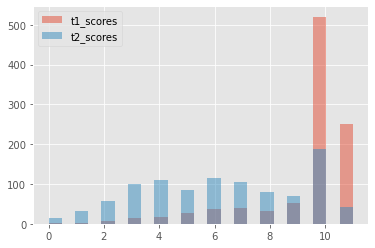

In [106]:
plt.style.use('ggplot')
plt.hist(strategy_results['t1_scores'], bins=23, alpha=0.5, label='t1_scores')
plt.hist(strategy_results['t2_scores'], bins=23, alpha=0.5, label='t2_scores')
plt.legend(loc='upper left')

## Loop through games played, collect hand_results

In [107]:
import pandas as pd

In [108]:
from utils import return_off_suit, get_teammate

In [223]:
euchre_game = EuchreGame()
hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
hand_results[0]

{'player_hands': {'p1': ['Q_H', 'Q_S', '9_H', 'J_S', 'K_H'],
  'p2': ['J_H', 'T_C', 'T_H', '9_D', '9_S'],
  'p3': ['Q_D', '9_C', 'K_C', 'K_S', 'K_D'],
  'p4': ['J_D', 'J_C', 'A_S', 'Q_C', 'T_D']},
 'calling_player': 'p1',
 'card_flipped_up': 'T_S',
 'trump': 'H',
 'dealer': 'p4',
 'next_to_deal': ['p3', 'p4', 'p1', 'p2'],
 'hand_score': {'t1': 0, 't2': 2},
 'trick_winners': {'p1': 2, 'p2': 2, 'p3': 0, 'p4': 1}}

In [277]:
def count_suits_in_hand(hand, trump):
    """
    Function to return the number of suits in a given hand
    """
    suits = set()
    for card in hand:
        if return_off_suit(card[-1]) == trump and card[0] == 'J':
            suits.add(trump)
        elif card[-1] not in suits:
            suits.add(card[-1])
    return len(suits)

In [271]:
assert count_suits_in_hand(hand=['J_C', 'J_S'], trump='S') == 1
assert count_suits_in_hand(hand=['J_S', 'T_S'], trump='C') == 2
assert count_suits_in_hand(hand=['J_S'], trump='C') == 1
assert count_suits_in_hand(hand=['J_S', 'T_S', 'T_D'], trump='C') == 3

In [278]:
def return_df_from_hand_results(hand_results_dict):
    fields_to_collect = ['tricks_won',
                         'is_calling_player',
                         'teammate_called',
                         'has_right', 
                         'has_left',
                         'has_Atrump',
                         'has_Ktrump',
                         'has_Qtrump',
                         'has_Ttrump',
                         'has_9trump',
                         'num_off_A',
                         'num_off_K',
                         'num_off_Q', 
                         'num_suits']
    results_list = []
    for player in hand_results_dict['trick_winners'].keys():
        player_hand_results = dict.fromkeys(fields_to_collect,0)
        player_hand_results['tricks_won'] = hand_results_dict['trick_winners'][player]
        player_hand_results['partner_tricks'] = hand_results_dict['trick_winners'][get_teammate(player)]
        player_hand_results['player_seat'] = hand_results_dict['next_to_deal'].index(player) + 1
        player_hand_results['num_suits'] = count_suits_in_hand(hand=hand_results_dict['player_hands'][player], 
                                                                trump=hand_results_dict['trump'])
        if player == hand_results_dict['calling_player']:
            player_hand_results['is_calling_player'] = 1
        if get_teammate(player) == hand_results_dict['calling_player']:
            player_hand_results['teammate_called'] = 1
        for idx, card in enumerate(hand_results_dict['player_hands'][player]):
            if card[-1] == hand_results_dict['trump']:
                if card[0] == 'A':
                    player_hand_results['has_Atrump'] = 1
                if card[0] == 'K':
                    player_hand_results['has_Ktrump'] = 1
                if card[0] == 'Q':
                    player_hand_results['has_Qtrump'] = 1
                if card[0] == 'J':
                    player_hand_results['has_right'] = 1
                if card[0] == 'T':
                    player_hand_results['has_Ttrump'] = 1
                if card[0] == '9':
                    player_hand_results['has_9trump'] = 1
            else:
                if card[0] == 'A':
                    player_hand_results['num_off_A'] += 1
                if card[0] == 'K':
                    player_hand_results['num_off_K'] += 1
                if card[0] == 'Q':
                    player_hand_results['num_off_Q'] += 1
                if card[0] == 'J':
                    if return_off_suit(card[-1]) == hand_results_dict['trump']:
                        player_hand_results['has_left'] = 1
        results_list.append(player_hand_results)
    return pd.DataFrame(results_list)

In [289]:
%%time

N_GAMES_TO_PLAY = 10000

all_hand_results_df = pd.DataFrame()
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    game_results_df = pd.DataFrame()
    for hand in hand_results:
        hand_results_df = return_df_from_hand_results(hand)
        game_results_df = pd.concat([game_results_df, hand_results_df])
    all_hand_results_df = pd.concat([all_hand_results_df, game_results_df])

Wall time: 6min 12s


In [290]:
all_hand_results_df.shape

(476716, 16)

In [291]:
all_hand_results_df.sort_values('tricks_won', ascending=False).head(10)

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,num_suits,partner_tricks,player_seat
1,5,1,0,1,1,1,0,0,0,1,0,0,1,2,0,2
3,5,1,0,0,0,0,1,1,0,1,1,0,0,2,0,2
1,5,1,0,1,0,0,1,0,0,1,0,2,0,3,0,3
0,5,1,0,1,0,0,1,0,1,1,1,0,0,2,0,1
3,5,1,0,1,1,0,0,0,1,1,0,1,0,2,0,4
3,5,1,0,0,0,0,1,1,1,1,1,0,0,2,0,2
3,5,1,0,1,1,0,1,0,0,1,0,0,0,2,0,3
0,5,1,0,1,0,0,0,1,0,1,0,1,0,2,0,3
1,5,1,0,1,0,0,1,1,0,1,1,0,0,2,0,4
3,5,1,0,0,0,0,1,0,0,1,1,0,1,3,0,4


In [292]:
# check hand with right bauer didn't take 0 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']==0) & (all_hand_results_df['has_right']==1)].shape[0] == 0

In [293]:
# check hands with right and left didn't ever take less than 2 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<2) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1)].shape[0] == 0

In [294]:
# check hands with right and left and Atrump didn't ever take less than 3 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<3) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1) & 
                           (all_hand_results_df['has_Atrump']==1)].shape[0] == 0

In [295]:
all_hand_results_df.groupby(['has_right', 
                             'has_left', 
                            'has_Atrump', 
                            #'has_Ktrump', 
                            # 'has_Qtrump'
                            ]).agg(avg_tricks=('tricks_won', 'mean'), num_hands=('has_right','count'))

avg_tricks  num_hands
has_right has_left has_Atrump                       
0         0        0             0.673688     244873
                   1             1.294869      28043
          1        0             1.124839      89956
                   1             2.131707       6803
1         0        0             2.406606      78206
                   1             2.926866      10515
          1        0             3.196125      16673
                   1             4.038251       1647

#### Write out all hand results to csv local

In [296]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\euchre'

In [297]:
all_hand_results_df.to_csv('all_hand_results.csv', index=False)

### Next steps for development

In [ ]:
# Rebuild code with classes

# Build out play card strategy
    # check if player has nontrump card that can win hand, double check left bauer trump
    # add logic to check what cards have been played in hand so far
        # player_short_suits_dict - keep track of what players don't have what suits based on following suit

# Build out strategy for play_lead_card function to reduce number of suits in hand, play toward partner short-suits

# Handle loners
    # add functionality to determine trump to check loner strategy, return loner_called boolean to play_hand
        # start with strategy to call loner when right/left and 4 total trump
    # update play_trick to pass in loner_called, remove partner of calling_player from next_to_play_list

# Build out strategy for calling trump
    # Add consideration to include if partner is dealer, if player is dealer, if player in seat 1 with lead, etc.
    # Add consideration to how high the card_flipped_up is - more likely if 9,T, less if J

# Build out framework to evaluate statistical significance of different strategies
    # chart overlapping histograms of points scored for different strategies across hands
    # Evaluate player tricks won, team tricks won for each hand type for each game

# Code cleanup
    # Add tests, comments to all functions
    # README, docs

# Look at combinations of exactly unique hands, vs. unique types of hands

# Can you "count on your partner for 1"? What is the average number of tricks taken by the partner of the calling player?
# When (if ever) is it a good idea to overtake a trick your partner is currently winning?
# When is it appropriate to not play the highest or lowest card within a suit but the mid?
    # 9, K, right of trump - use K to take trick, lead right, then play 9
    # is this ever best in nontrump?
# When is it appropriate to lead trump? Is it always best to lead right bauer? Is there ever a situation where it is optimal NOT to lead right bauer?

In [52]:
import random

class Deck:
    def __init__(self):
        suits = ['S', 'C', 'H', 'D']
        values = ['9', 'T', 'J', 'Q', 'K', 'A']
        self.cards = [value + '_' + suit for value in values for suit in suits]
        
    def shuffle(self):
        return random.shuffle(self.cards)

    def deal_hand(self):
        """
        Function to deal cards for hand
        :returns player_hands dict, card_flipped_up
        """
        deck_of_cards = self.cards
        player_hands = {'p1': [deck_of_cards[i] for i in range(0, 5)],
                        'p2': [deck_of_cards[i] for i in range(5, 10)],
                        'p3': [deck_of_cards[i] for i in range(10, 15)],
                        'p4': [deck_of_cards[i] for i in range(15, 20)]}
        return player_hands, deck_of_cards[20]
    
    def __str__(self):
        return "\n".join(str(card) for card in self.cards)

In [53]:
my_deck = Deck()

In [63]:
my_deck.shuffle()

In [64]:
my_deck.cards

['A_S',
 'Q_D',
 'K_H',
 'K_D',
 'J_S',
 'J_D',
 'Q_H',
 'K_S',
 'J_H',
 'Q_S',
 '9_S',
 'Q_C',
 'T_C',
 'A_D',
 '9_D',
 'A_H',
 'K_C',
 '9_H',
 'T_H',
 '9_C',
 'A_C',
 'T_D',
 'J_C',
 'T_S']

In [65]:
my_deck.deal_hand()

({'p1': ['A_S', 'Q_D', 'K_H', 'K_D', 'J_S'],
  'p2': ['J_D', 'Q_H', 'K_S', 'J_H', 'Q_S'],
  'p3': ['9_S', 'Q_C', 'T_C', 'A_D', '9_D'],
  'p4': ['A_H', 'K_C', '9_H', 'T_H', '9_C']},
 'A_C')

In [ ]:
class Game:
    def __init__(self, players):
        self.players = ['p2', 'p3', 'p4', 'p1']
        self.deck = Deck()
        self.score = {'t1': 0, 't2': 0}

    def setup(self):
        self.deck.shuffle()
        hands = self.deck.deal(len(self.players), 5)
        for i, player in enumerate(self.players):
            player.add_cards(hands[i])

    def start(self):
        # Implement the game logic here
        pass

    def determine_trump_suit(self):
        # Implement trump suit determination logic here
        pass

    def play_round(self):
        # Implement a single round of the game here
        pass

    def score_round(self):
        # Implement scoring logic for each round here
        pass

    def __str__(self):
        return f"Game with players: {', '.join(player.name for player in self.players)}"


In [68]:
TEAM_ASSIGNMENTS = {
    'p1': 't1',
    'p2': 't2',
    'p3': 't1',
    'p4': 't2',
}

In [69]:
player = 'p3'

In [70]:
TEAM_ASSIGNMENTS[player]

't1'

In [3]:
def return_off_suit(suit: str) -> str:
    """
    Function to return off-suit given suit
    :param: suit
    :returns suit
    """
    suit_mapping = {'H': 'D', 'D': 'H', 'C': 'S', 'S': 'C'}
    return suit_mapping.get(suit, suit)

In [8]:
def is_card_trump(card, trump):
    """
    Function to return if given card is trump
    :param: card
    :param: trump
    :returns True/False
    """
    if card[-1] == trump:
        return True
    elif return_off_suit(card[-1]) == trump and card[0] == 'J':
        return True
    else:
        return False

In [9]:
is_card_trump(card="J_C", trump="H")

False

In [10]:
is_card_trump(card="J_C", trump="C")

True

In [11]:
is_card_trump(card="J_C", trump="S")

True